# Importing Dependencies

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [70]:
df = pd.read_csv("diabetes_dataset.csv")

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Dataset Columns**:

- **Pregnancies**: Number of times the patient has been pregnant.
- **Glucose**: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
- **BloodPressure**: Diastolic blood pressure (mm Hg).
- **SkinThickness**: Triceps skinfold thickness (mm).
- **Insulin**: 2-hour serum insulin (µU/ml).
- **BMI**: Body mass index (weight in kg/(height in m)^2).
- **DiabetesPedigreeFunction**: A function that represents the patient’s diabetes pedigree (i.e., likelihood of diabetes based on family history).
- **Age**: Age of the patient (years).
- **Outcome**: Binary outcome (0 or 1) where 1 indicates the presence of diabetes and 0 indicates the absence.

In [73]:
# Size of data 
df.shape

(768, 9)

# EDA(Exploratory Data Analysis)

## Data Preprocessing

In [74]:
# Checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
# Check statistic of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Key Findings:-** 
- **Average** age of Patients is **33-34**.
- The minimum & maximum age of Patients are **21 and 81**.
- The **Average** number of Pregnancy is **3-4** times.

In [76]:
# Check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [77]:
# Check Duplicated Values
print(f"The number of Duplicated Values present in data set is {df.duplicated().sum()}")

The number of Duplicated Values present in data set is 0


In [78]:
# check mean values for each group of Outcome. 
df.select_dtypes(include=['int64','float64']).groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Data Analysis

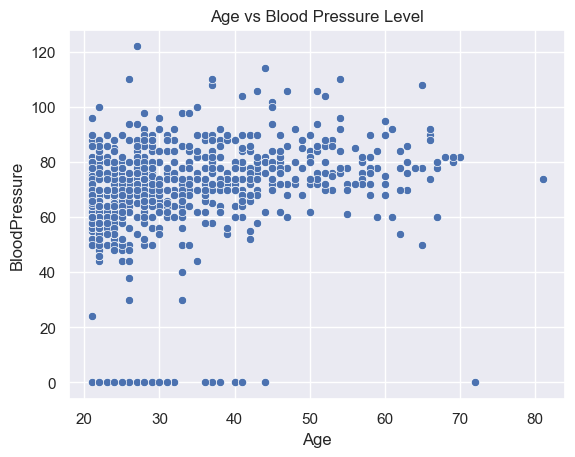

In [79]:
# Analysis of BloodPressure based on age
sns.set()
sns.scatterplot(x="Age", y="BloodPressure", data=df)
plt.title("Age vs Blood Pressure Level")
plt.show()

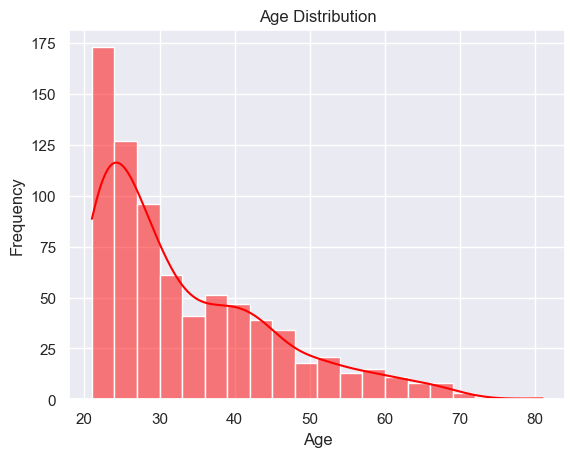

In [80]:
# Distribution of age of patients
sns.histplot(df['Age'], bins=20, kde=True, color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Findings:-** 
- Here, Age is **Right Skewed** means it is positive skewed.
- The younger patients visite more frequently than old patients.

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Diabetes vs Non Diabetes

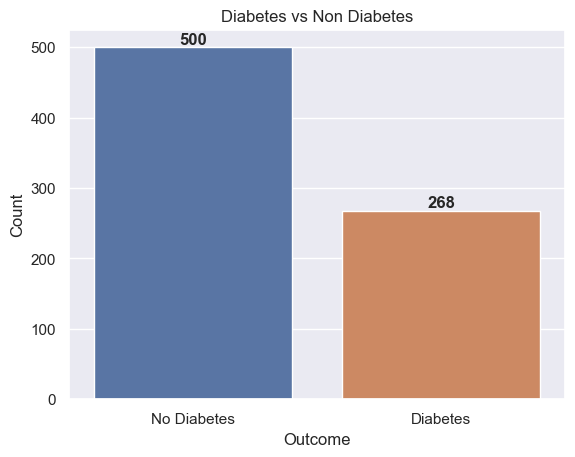

In [82]:
ax = sns.countplot(data=df, x='Outcome', hue='Outcome', legend=False)

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

# Customize the plot
plt.title('Diabetes vs Non Diabetes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel('Count')

# Show the plot
plt.show()

### Average BMI, glucose levels, and blood pressure of patients

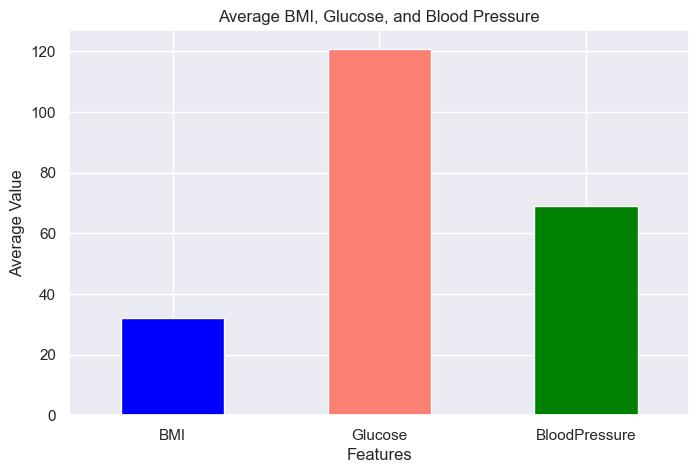

In [83]:
averages = df[['BMI', 'Glucose', 'BloodPressure']].mean()
averages.plot(kind='bar', color=['blue', 'salmon', 'green'], figsize=(8, 5))
plt.title('Average BMI, Glucose, and Blood Pressure')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.xticks(rotation=0)  
plt.show()

### Glucose Level by Age

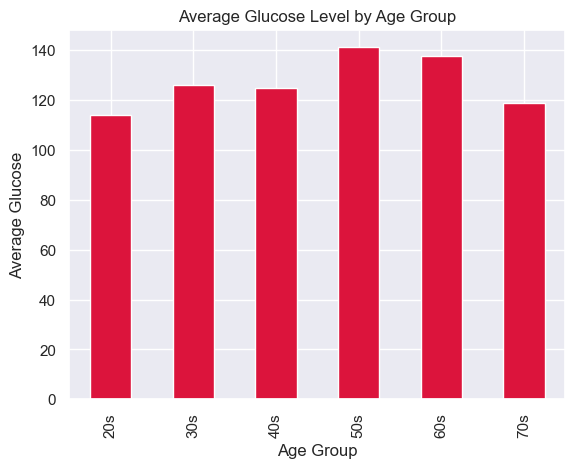

In [84]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70s'])
avg_glucose_by_age_group = df.groupby('AgeGroup',observed=True)['Glucose'].mean()
# print(avg_glucose_by_age_group)
avg_glucose_by_age_group.plot(kind='bar', color='crimson')
plt.title('Average Glucose Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Glucose')
plt.show()

### Check Outlier

In [85]:
feature_to_check_outliers = df.drop(columns=['Outcome','AgeGroup'])
feature_to_check_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


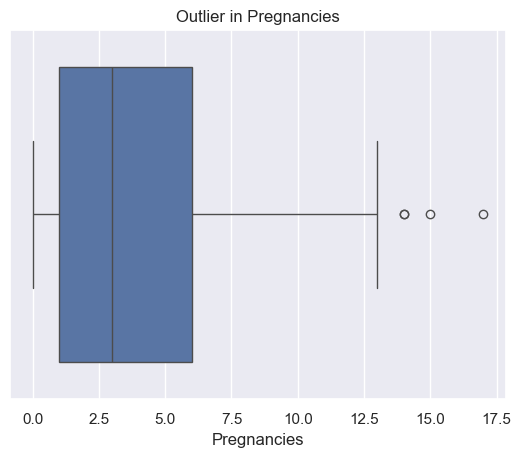

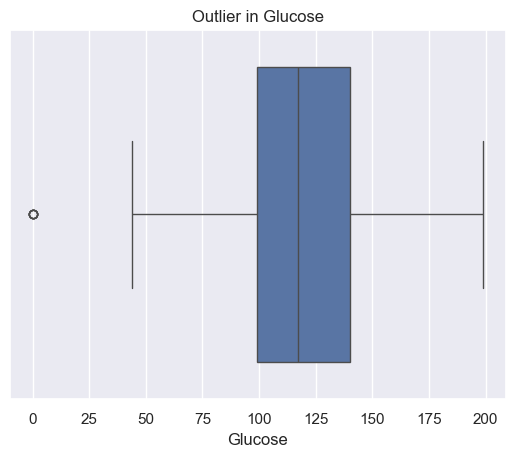

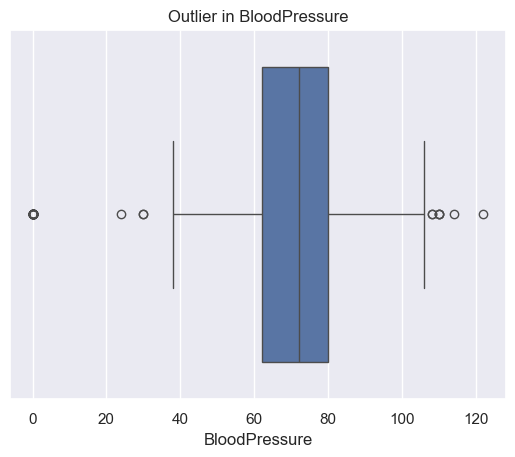

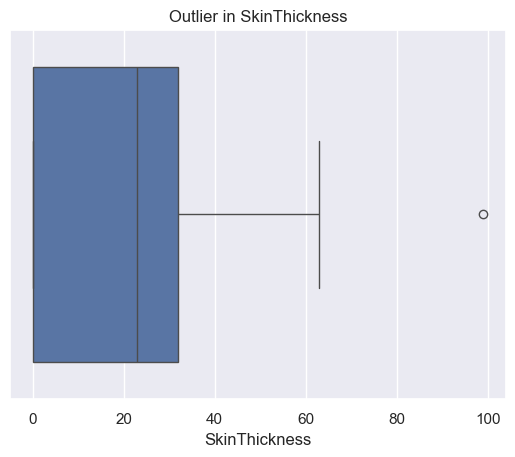

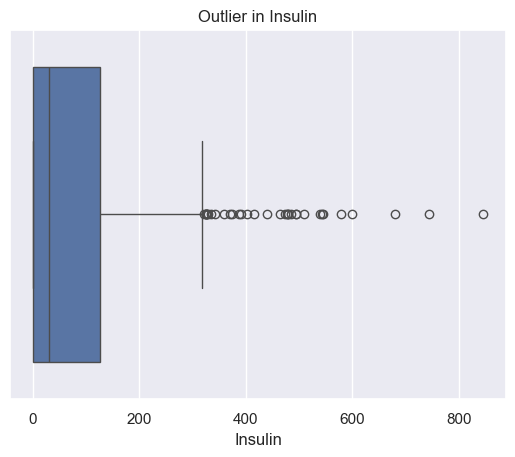

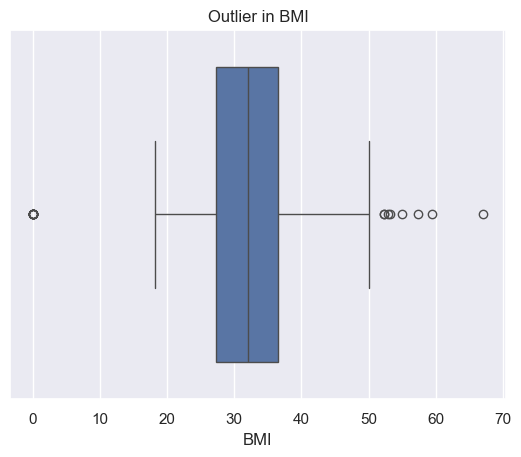

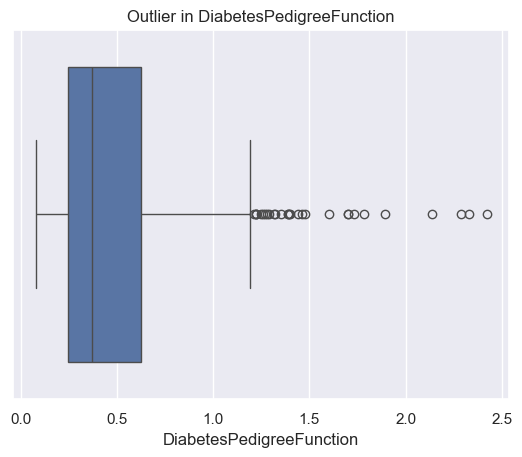

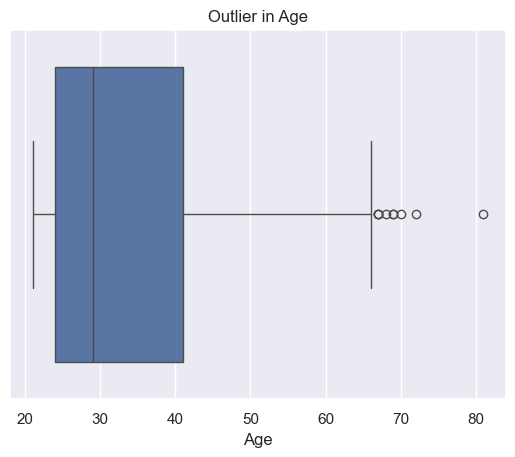

In [86]:
for cols in feature_to_check_outliers:
    sns.boxplot(x=cols,data=feature_to_check_outliers)
    plt.title(f"Outlier in {cols}")
    plt.show()

- Above Boxplot show the outliers present in the dataset 
- "Insulin", "BMI", "DiabetesPedigreeFunction" columns has more outliers.


### Removing Outliers

In [87]:
#Defining Function that remove outliers from the dataset of particular columns
def remove_outliers(df,columns):
    initial_size = len(df)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    final_size = len(df)
    percentage_removed = ((initial_size - final_size) / initial_size) * 100
    return df, percentage_removed

In [88]:
outlier_columns = ['Insulin','BMI','DiabetesPedigreeFunction']
cleaned_data,precentage_removed = remove_outliers(df,outlier_columns)

In [89]:
print(f"Percentage of Data Loss from Actual Data: {precentage_removed}%")

Percentage of Data Loss from Actual Data: 10.546875%


## Feature Engineering

In [90]:
cleaned_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,40s
1,1,85,66,29,0,26.6,0.351,31,0,30s
2,8,183,64,0,0,23.3,0.672,32,1,30s
3,1,89,66,23,94,28.1,0.167,21,0,20s
5,5,116,74,0,0,25.6,0.201,30,0,20s


In [91]:
# checking Correlation
corr = cleaned_data.select_dtypes(include=['int64','float64']).corr()

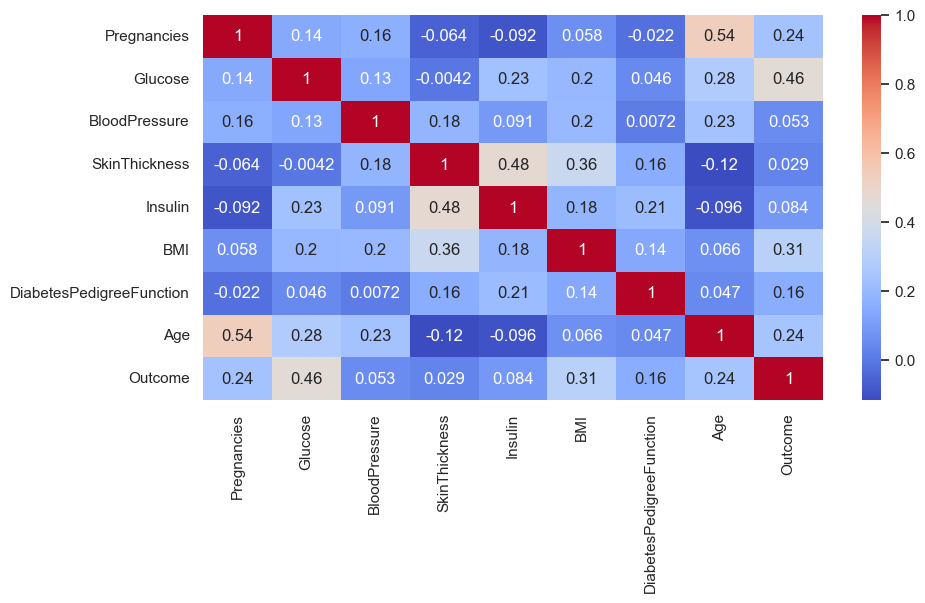

In [92]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Splitting Features

In [93]:
# splitting Features into X and Y
X = cleaned_data.drop(columns=['Outcome','AgeGroup'],axis=1)
Y = cleaned_data['Outcome']

In [94]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Data Standardization

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
sc.fit(X)

StandardScaler()

In [97]:
X = sc.transform(X)

### Train Test Spilt

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42) 

In [99]:
print(X.shape,X_train.shape,X_test.shape)

(687, 8) (549, 8) (138, 8)


### Model Training

In [100]:
from sklearn.svm import SVC
model = SVC(kernel='linear',random_state=42, probability=True)
model.fit(X_train,Y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Model Evaluation

In [101]:
from sklearn.metrics import accuracy_score,classification_report

In [102]:
# Accuracy Score of test data
Y_pred_testing = model.predict(X_test)
print(f"Accuracy score of the Test Data is {accuracy_score(Y_pred_testing,Y_test)*100:.2f}%")

Accuracy score of the Test Data is 75.36%


In [103]:
# Accuracy Score of train data
Y_pred = model.predict(X_train)
print(f"Accuracy score of the Train Data is {accuracy_score(Y_pred,Y_train)*100:.2f}%")

Accuracy score of the Train Data is 79.60%


In [108]:
print(classification_report(Y_pred_testing,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       107
           1       0.47      0.68      0.55        31

    accuracy                           0.75       138
   macro avg       0.68      0.73      0.69       138
weighted avg       0.80      0.75      0.77       138



In [110]:
print(classification_report(Y_test,Y_pred_testing))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        93
           1       0.68      0.47      0.55        45

    accuracy                           0.75       138
   macro avg       0.73      0.68      0.69       138
weighted avg       0.74      0.75      0.74       138



### Making a Predictive System

In [ ]:
input_data= pd.DataFrame([input_data], columns=feature_names)

# Standardize the input data using the same scaler
std_data = sc.transform(input_data) 
print("Standardized Data:", std_data)

# Make prediction
prediction = model.predict(std_data)
print("Prediction:", prediction[0])

if prediction[0] == 1:
    print("You might have diabetes")
else:
    print("You might not have diabetes")


In [ ]:
# import joblib
# joblib.dump(model,"Diabetes_Prediction_model.pkl")

In [ ]:
# joblib.dump(sc,"Scaler.pkl")